<a href="https://colab.research.google.com/github/Pahan99/hybrid-classification/blob/main/kraken_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [2]:
# columns of kraken output report
columns = ['percentage', 'count', 'coverage', 'taxon', 'taxonomy_id', 'name']

In [3]:
# read the report file
df = pd.read_table('/content/drive/MyDrive/fyp code/output fa/report.tsv',header=None,names=columns)

In [4]:
df.shape

(4174, 6)

### Species Map

In [5]:
species_map = {}

In [6]:
unique_species = df[df['taxon'] == 'S']['name'].str.strip().unique()
len(unique_species)

1639

In [7]:
species_map = { }

In [8]:
idx = 0
while idx < df.shape[0]:
  taxon = df.iloc[idx,-3]
  name = df.iloc[idx,-1].strip()
  if taxon == 'S':
    species = name

  if bool(re.match(r'^S\d', taxon)):
    # print(name)
    species_map[name] = species
  idx+=1

In [9]:
species_map = {}

In [10]:
unique_species = df[df['taxon'] == 'S']['name'].str.strip().unique()
len(unique_species)

1639

### Genus Map

In [11]:
genus_map = { }

In [12]:
idx = 0
while idx < df.shape[0]:
  taxon = df.iloc[idx,-3]
  name = df.iloc[idx,-1].strip()
  if taxon == 'G':
    genus = name

  if bool(re.match(r'^G\d', taxon)) or taxon.startswith('S'):
    # print(name)
    genus_map[name] = genus
  idx+=1

### Family Map

In [13]:
family_map = { }

In [14]:
idx = 0
while idx < df.shape[0]:
  taxon = df.iloc[idx,-3]
  name = df.iloc[idx,-1].strip()
  if taxon == 'F':
    family = name

  if bool(re.match(r'^F\d', taxon)) or taxon.startswith('G') or taxon.startswith('S'):
    # print(name)
    family_map[name] = family
  idx+=1

### Order Map

In [15]:
order_map = { }

In [16]:
idx = 0
while idx < df.shape[0]:
  taxon = df.iloc[idx,-3]
  name = df.iloc[idx,-1].strip()
  if taxon == 'O':
    order = name

  if bool(re.match(r'^O\d', taxon)) or taxon.startswith('F') or taxon.startswith('G') or taxon.startswith('S'):
    # print(name)
    order_map[name] = order
  idx+=1

In [19]:
merged_df = pd.read_csv('/content/drive/MyDrive/fyp code/kraken/kraken2.csv')

In [20]:
merged_df.head(20)

,seq_id,status,taxonomy_id,taxon,name
0,4d4262d4-c552-4b8b-a09f-fc9f58c6e283,C,1279,G,Staphylococcus
1,cd4133d1-f92f-44d0-a85c-3ae93f036256,C,1613,S,Limosilactobacillus fermentum
2,fcf98c1d-38ee-4b11-a243-460abb9d6733,C,1613,S,Limosilactobacillus fermentum
3,91694d0d-293e-418e-ab8b-fd2ecb53610b,U,0,U,unclassified
4,a955709e-96d8-450d-8991-d9cce436d288,C,1279,G,Staphylococcus
5,0dfc8a31-5140-473e-b707-d6dd314f3347,C,1613,S,Limosilactobacillus fermentum
6,e6353177-62b7-4f0f-9464-b80b81851aa3,U,0,U,unclassified
7,9f6f6c5f-80e7-4335-aae2-b7f4666c4e3a,C,33958,F,Lactobacillaceae
8,1c09cf9d-c569-4489-818e-8c0555afc2cb,C,543,F,Enterobacteriaceae
9,43edd670-7e2a-4ea7-8d2f-6879a5f7d93a,C,1613,S,Limosilactobacillus fermentum


In [21]:
merged_df.taxon.value_counts()

S     829088
U     188992
G      57581
S1     34318
F      18225
S2     15790
S3      5635
O       3448
D       2241
G1      2095
C       1091
D1       894
R        384
P        327
R1       256
R2       113
S4        20
G2        17
F1        11
Name: taxon, dtype: int64

In [23]:
def filter_df(df,filter_):
  """
  A function to filter the dataframe based on the filter provided
  Parameters:
    df (pd.DataFrame): dataframe to be filtered
    filter_ (str): filter to be applied
  Returns: filtered dataframe
  """
  df.loc[filter_, 'label'] = df.loc[filter_, 'name'].str.strip()
  df.loc[~filter_, 'label'] = 'unknown'
  return df

In [24]:
genus_filter = merged_df['taxon'].str.startswith('S') | merged_df['taxon'].str.startswith('G')
species_filter = merged_df['taxon'].str.startswith('S')

In [25]:
df_new = filter_df(merged_df,species_filter)

In [26]:
df_new['label'].value_counts()

Limosilactobacillus fermentum           612555
unknown                                 275675
Bacillus spizizenii                      55676
Enterococcus faecalis                    37721
Staphylococcus aureus                    35582
                                         ...  
Tenacibaculum ovolyticum                     1
Dechloromonas denitrificans                  1
Cellulomonas taurus                          1
Limnospira fusiformis KN01                   1
Stackebrandtia nassauensis DSM 44728         1
Name: label, Length: 2445, dtype: int64

Selecting 1000 random points

In [27]:
# Load the selected 1000 indices
sampled_indices = np.load('/content/drive/MyDrive/fyp code/output fa/sampled_indices.npy')

In [29]:
sampled_indices.shape

(1000,)

## Plotting the results

In [30]:
def get_mapped_label(label,map):
  """
  A function to replace the label with the mapped label
  Parameters:
    label (str): the label to be replaced
    map (dict): the dictionary containing the mapping
  Returns:
    str: the mapped label
  """
  return label.replace(map)

In [40]:
def plot(features, label, map_, reducer, keep_unknown=True):
  """
  A function to plot the features in 2D space using the given feature reduction technique.
  Parameters:
    features: numpy array of shape (n_samples, n_features)
    label: numpy array of shape (n_samples,)
    map_: a dictionary mapping the labels to integers
    reducer: string, the name of the feature reduction technique used
    keep_unknown: boolean, whether to keep the unknown labels or not
  Returns:
    None
  """

  if not keep_unknown:
    mask = label == 'unknown'
    features = features[~mask]
    label = label[~mask]

  mapped_label = get_mapped_label(label,map_)

  plt.figure(figsize=(8, 8))

  scatter_plot = sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=mapped_label, palette='dark')

  plt.title('Scatter Plot of Features (Kraken2)')
  plt.xlabel(f'{reducer} Feature 1')
  plt.ylabel(f'{reducer} Feature 2')

  legend = plt.legend(bbox_to_anchor=(1, 1))


  plt.show()

In [35]:
reducer = 'pca' # pca,tsne, umap
k = 4
path = f'/content/drive/MyDrive/fyp code/seq2vec/k_{k}/reduced_{reducer}_k_{k}.npy'

In [36]:
from urllib.request import pathname2url
features = np.load(path)
features.shape

(1000, 2)

In [37]:
label = df_new['label']
label.shape

(1160526,)

In [38]:
# selected_features = features[sampled_indices]
selected_features = features

selected_label = label[sampled_indices]

### Species level

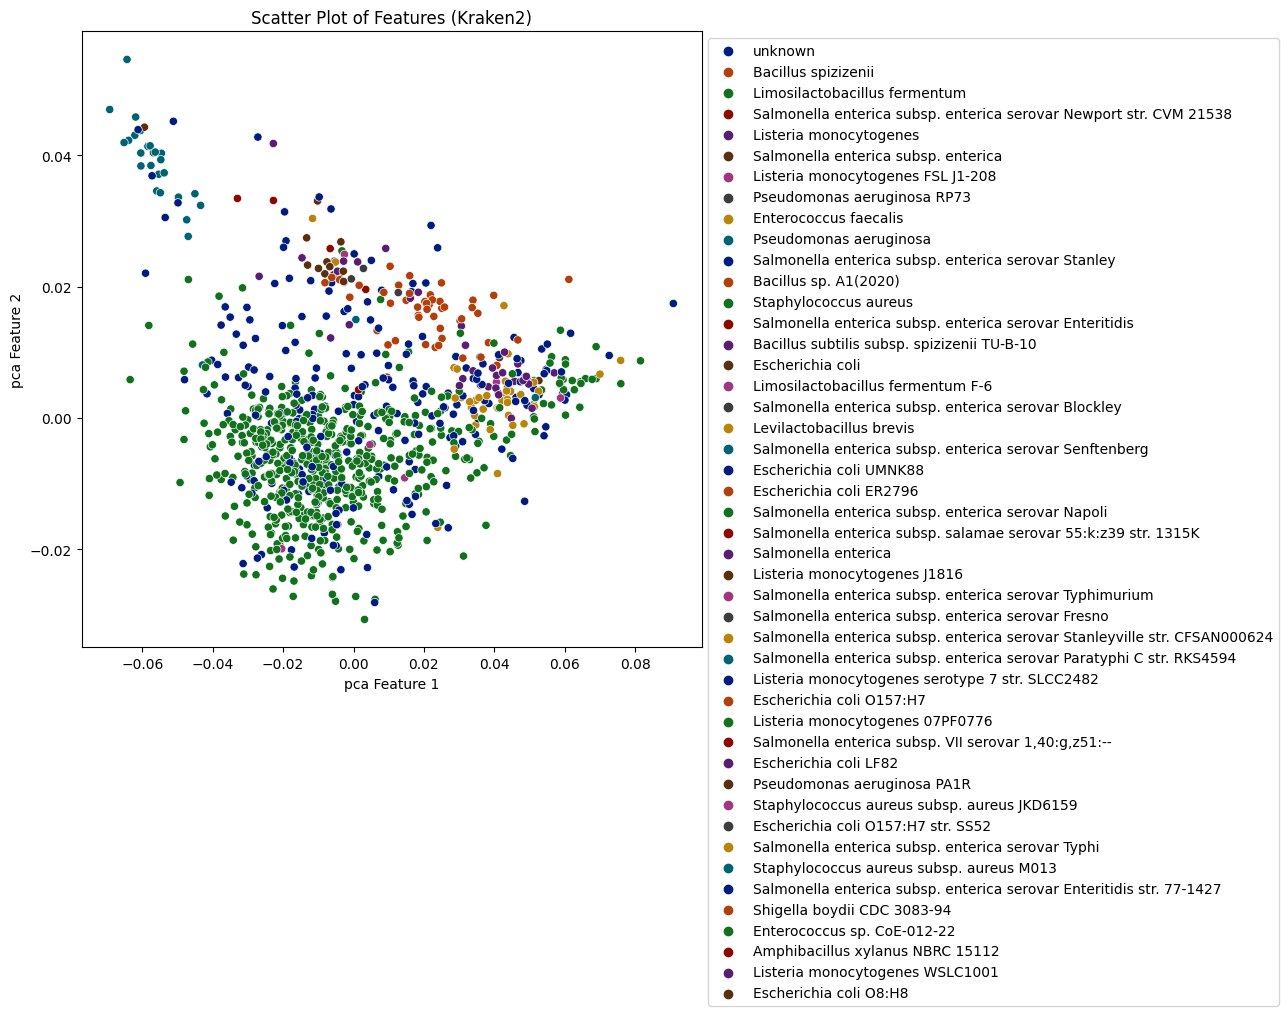

In [42]:
plot(selected_features, selected_label, species_map,reducer)

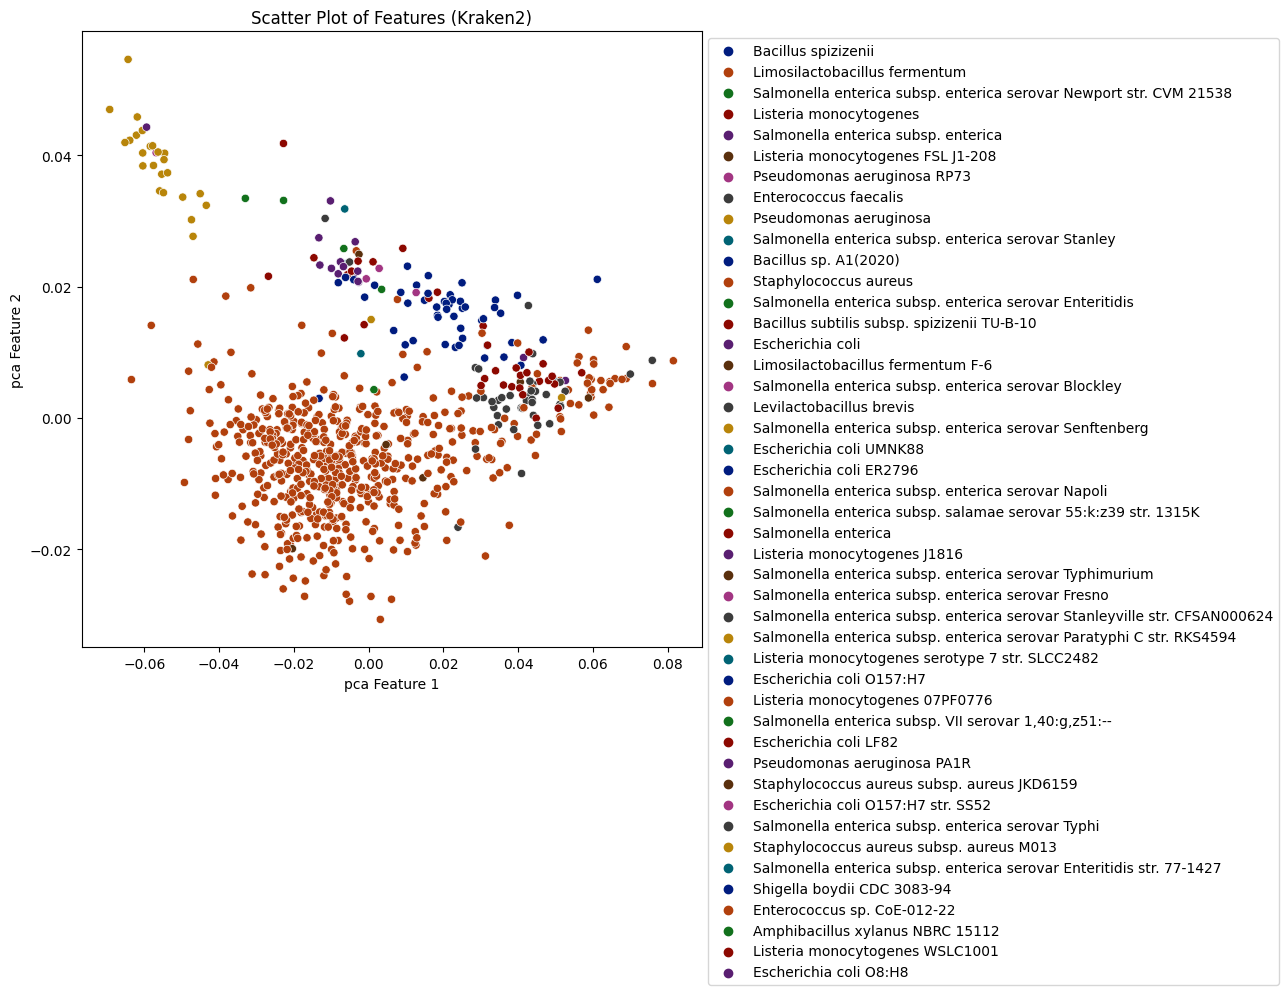

In [43]:
plot(selected_features, selected_label, species_map, reducer, False)

### Genus level

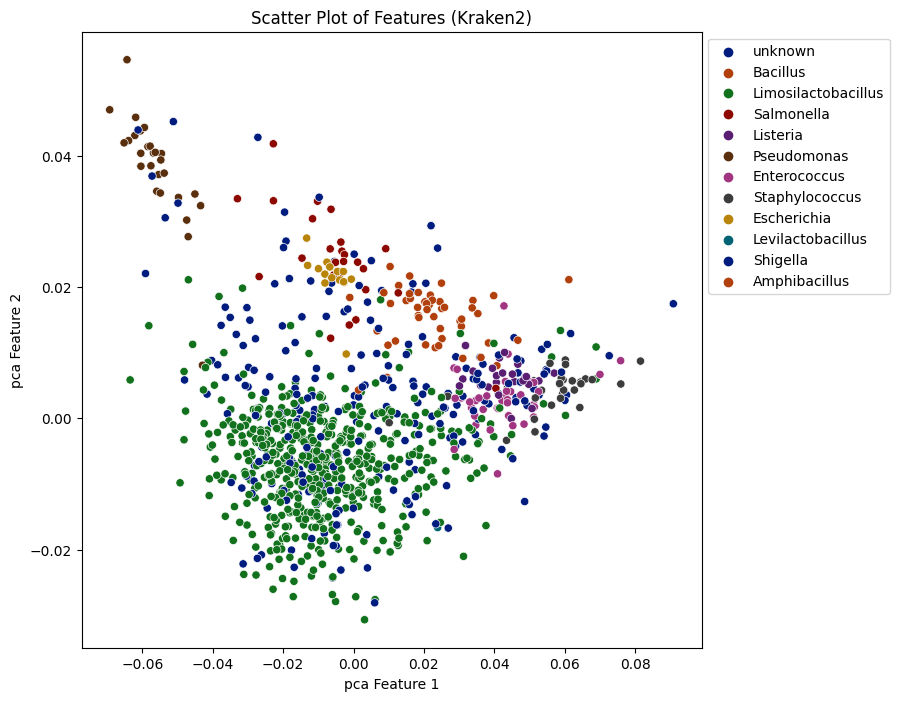

In [44]:
plot(selected_features, selected_label, genus_map, reducer)

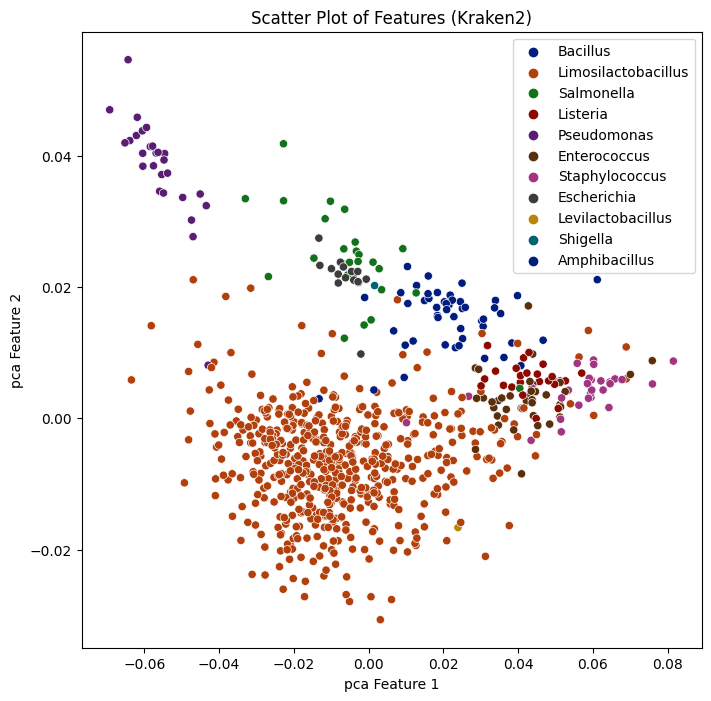

In [45]:
plot(selected_features, selected_label, genus_map, reducer, False)

### Family level

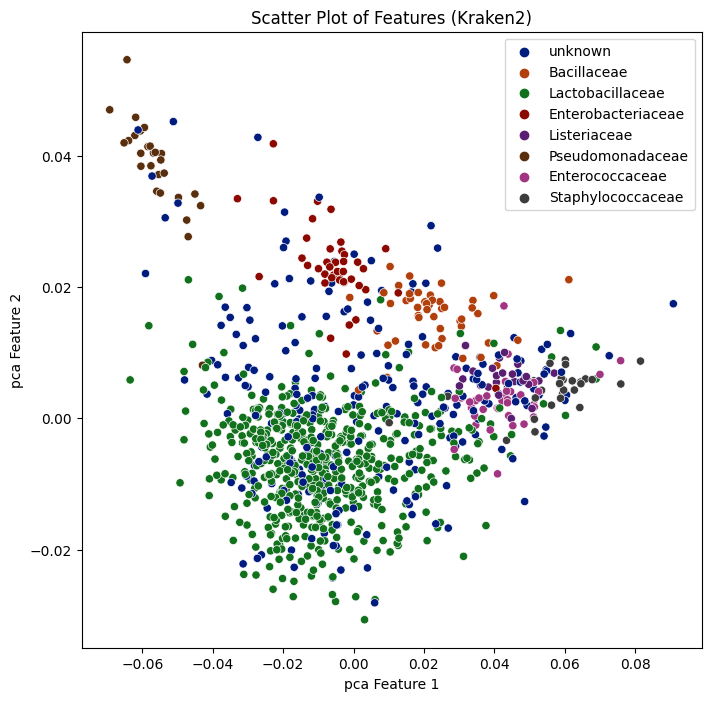

In [46]:
plot(selected_features, selected_label, family_map, reducer)

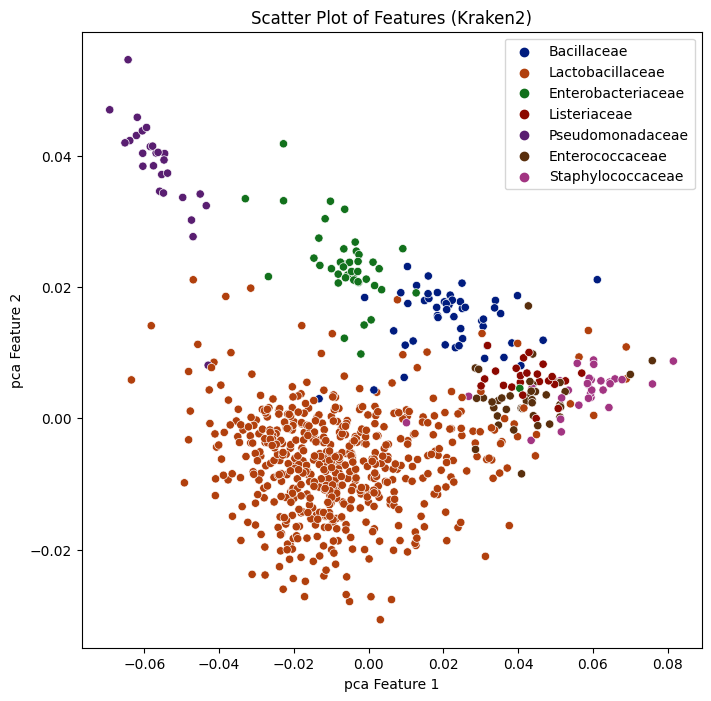

In [47]:
plot(selected_features, selected_label, family_map, reducer, False)

### Order level

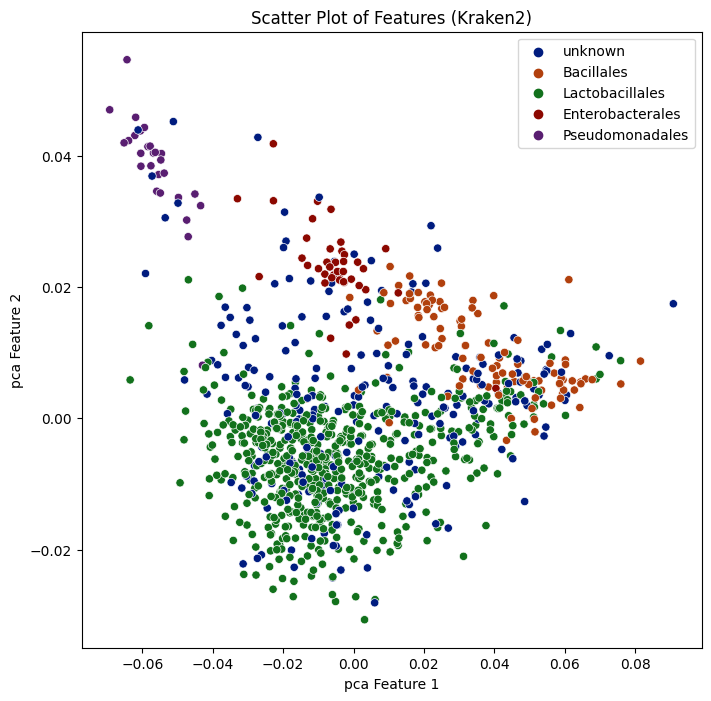

In [48]:
plot(selected_features, selected_label, order_map, reducer)

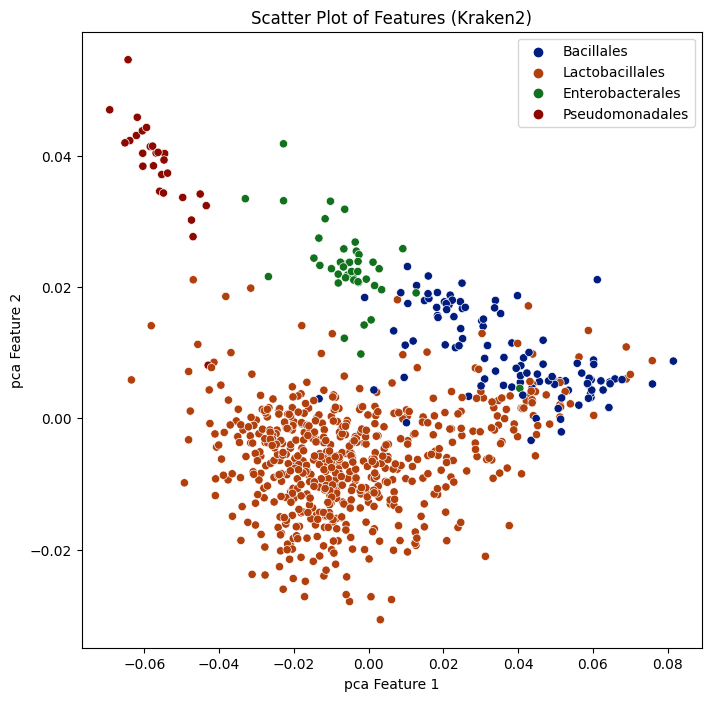

In [49]:
plot(selected_features, selected_label, order_map, reducer, False)